<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center"> Linear Regression (Tips)</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
7,26.88,3.12,Male,No,Sun,Dinner,4
4,24.59,3.61,Female,No,Sun,Dinner,4
78,22.76,3.00,Male,No,Thur,Lunch,2
167,31.71,4.50,Male,No,Sun,Dinner,4
20,17.92,4.08,Male,No,Sat,Dinner,2


<img src="https://www.techrepublic.com/a/hub/i/2016/10/17/b8fc1ae1-fb59-4d54-88a4-291db27c1ae6/explorehero.jpg" width=50% />

In [8]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [9]:
df2=df.groupby('day').sum() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [10]:
df3=df.groupby('smoker').sum()
df3['percent'] = df3['tip']/df3['total_bill']*100
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [11]:
df4= df.groupby(['day','size']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows
df4

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5           0.00    0.00        NaN
     6           0.00    0.00        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6           0.00    0.00        NaN
Sun  1           0.00    0.00        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

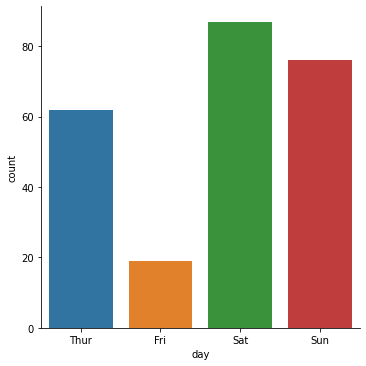

In [12]:
sns.catplot(x='day' ,kind="count",data=df)

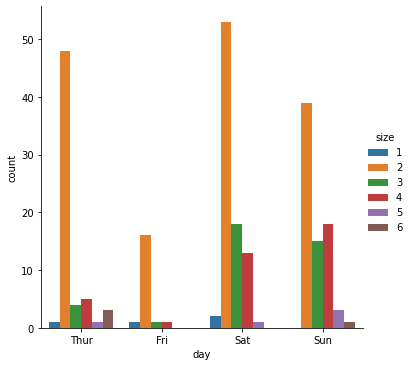

In [13]:
sns.catplot(x='day' ,hue="size",kind="count", data=df)

## convert sex and smoker columns to values

In [14]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [15]:
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
# df = df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} )

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [16]:
days=pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
59,0,0,1,0
47,0,0,0,1
149,1,0,0,0
128,1,0,0,0
167,0,0,0,1


In [17]:
days=pd.get_dummies(df['day'])
df = pd.concat([df,days],axis=1)

In [18]:
times=pd.get_dummies(df['time'])
df = pd.concat([df,times],axis=1)

In [19]:
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,0,1,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,0,1,0,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,0,0,1,0,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,0,0,1,0,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,0,0,1,0,0,1


In [93]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:>

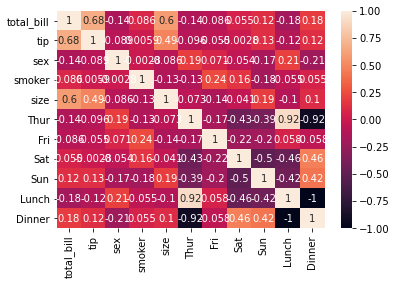

In [98]:
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True)

In [71]:
X = df[['total_bill','size']]
Y = df[['tip']]

In [72]:
X

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [73]:
Y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/390px-Scikit_learn_logo_small.svg.png">

In [74]:
import sklearn

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [76]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [77]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
predictions=regressor.predict(X_test)

In [79]:
X_test

,total_bill,size
135,8.51,2
111,7.25,1
124,12.48,2
227,20.45,4
125,29.80,6
...,...,...
100,11.35,2
205,16.47,3
92,5.75,2
94,22.75,2


In [80]:
predictions[0]

array([1.75039208])

In [81]:
y_test

,tip
135,1.25
111,1.00
124,2.52
227,3.00
125,4.20
...,...
100,2.50
205,3.23
92,1.00
94,3.25


<AxesSubplot:ylabel='Count'>

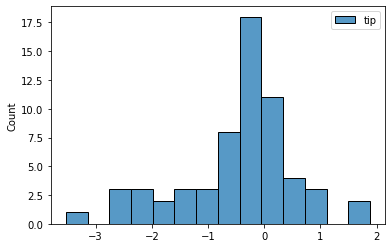

In [82]:
sns.histplot(y_test-predictions)

### 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

<img src="https://cdn-images-1.medium.com/max/800/1*4kvomfLGxysM67hza_-B9Q.png" width=25% />

###  2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

<img src="https://cdn-images-1.medium.com/max/800/1*T37cOEU9OkXNPuqGQcXHSA.png" width=25% />

###  3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

<img src="https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif" width=25% />

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7719482628296889
Mean Squared Error: 1.2208104766422327
Root Mean Squared Error: 1.104902926343411


## New Data

In [88]:
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


## new_customer

In [89]:
new_customer = np.array([16.99,2]).reshape(1,-1)
regressor.predict(new_customer)

array([[2.77937785]])

In [90]:
regressor.coef_

array([[ 0.12134266, -0.0161953 ]])

In [91]:
regressor.intercept_

array([0.75015663])

In [92]:
regressor.score

<bound method RegressorMixin.score of LinearRegression()>